## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0, 20)

In [3]:
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
y = -2*X + 1

In [5]:
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

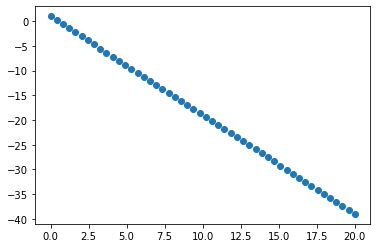

In [6]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [7]:
def hyp(X_in, theta_0_in, theta_1_in):
    h_x = []
    for i in range(len(X_in)):
        h_x.append(theta_0_in + theta_1_in *X_in[i])
    return h_x


In [8]:

def cost_fun(X_in, y_in, theta_0_in,  theta_1_in, h):
    res = sum((h - y_in)**2)
    res = res * (1/(2*len(X_in)))
    return res


In [9]:
def gradient(X_in, y_in, h_in):
    g_0 = (1/len(X_in)) * sum(h_in - y_in)
    g_1 = (1/len(X_in)) * sum((h_in - y_in) * X_in)
    return g_0, g_1


In [10]:
def update_param(t_0, t_1, X_in, h_in, y_in, alpha):
    t_0 = t_0 - (alpha * (1/len(X_in)) * sum(h_in - y_in))
    t_1 = t_1 - (alpha * (1/len(X_in)) * sum((h_in - y_in) * X_in))
    return t_0, t_1


In [11]:
def GD(X_in, y_in, alpha, it_max):
    theta_0, theta_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    
    h = hyp(X_in, theta_0, theta_1)
    hyp_arr.append(h)
    
    j = cost_fun(X_in, y_in, theta_0, theta_1, h)
    loss_arr.append(j)
    
    theta_0, theta_1 = update_param(theta_0, theta_1, X_in, h, y_in, alpha)
    theta_0_arr.append(theta_0)
    theta_1_arr.append(theta_1)
    
    for i in range(it_max):
        h = hyp(X_in, theta_0, theta_1)
        hyp_arr.append(h)
        
        grad_0, grad_1 = gradient(X_in, y_in, h)
        
        theta_0, theta_1 = update_param(theta_0, theta_1, X_in, h, y_in, alpha)
        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        j = cost_fun(X_in, y_in, theta_0, theta_1, h)
        loss_arr.append(j)
        # stop condition: when cost is very small
        if j < 0.01:
            break
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1

#### Try your function with any input parameterss of your choice.

In [12]:
alpha = 0.0001
max_it = 10000

In [13]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = GD(X, y, alpha, max_it)   

#### Calculate r2 score

In [15]:
r2_score(y, hyp(X, opt_t_0, opt_t_1))

0.9985487416265111

#### Plot loss vs. epochs

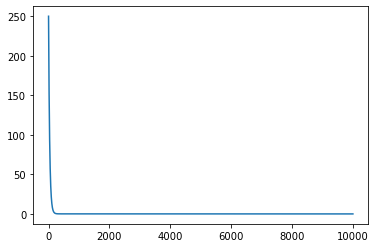

In [16]:
plt.plot(list(range(len(los_arr))),los_arr)

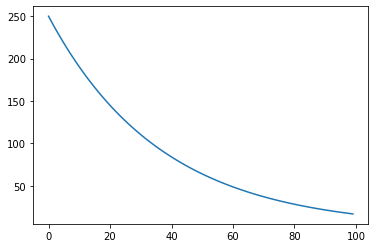

In [17]:
# loss in first 100 iterations
plt.plot(list(range(100)),los_arr[:100])

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

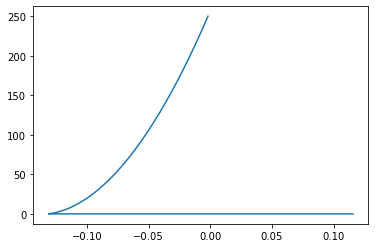

In [18]:
plt.plot(t_0_arr, los_arr)

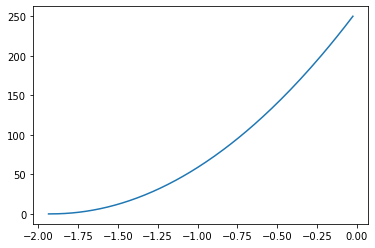

In [19]:
plt.plot(t_1_arr, los_arr)

#### Plot all regression lines till converge

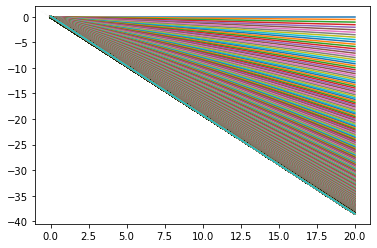

In [20]:
for i in range(max_it): 
    plt.plot(X, hyper_arr[i])

#### Plot the best regression line

<function matplotlib.pyplot.show(*args, **kw)>

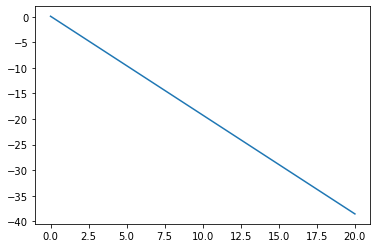

In [21]:
plt.plot(X,hyper_arr[-1])
#plt.scatter(X, y)
plt.show

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

### increase learning rate -> alpha = 0.001

In [22]:
# increase learning rate
alpha = 0.001
max_it = 10000
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = GD(X, y, alpha, max_it)   


In [23]:
print(len(t_0_arr))
print(len(t_1_arr))
print(len(los_arr))

5509
5509
5509


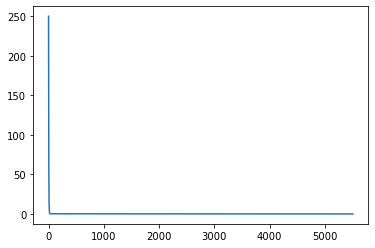

In [24]:
plt.plot(list(range(len(los_arr))),los_arr)

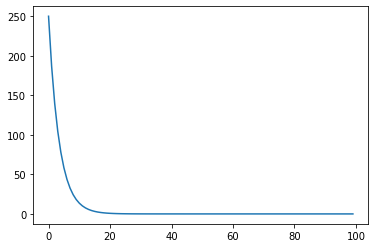

In [25]:
# loss in first 100 iterations
plt.plot(list(range(100)),los_arr[:100]) 
# clearly it converged faster

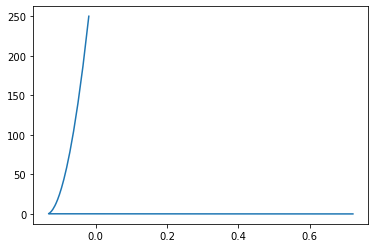

In [26]:
plt.plot(t_0_arr, los_arr)

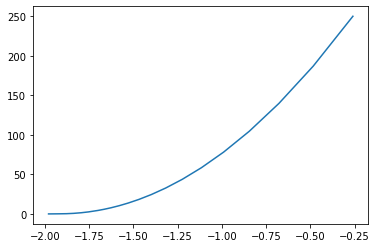

In [27]:
plt.plot(t_1_arr, los_arr)

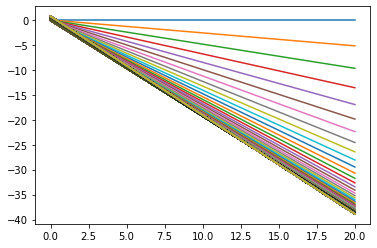

In [28]:
for i in range(len(hyper_arr)):
    plt.plot(X, hyper_arr[i])

### decrease iterations

In [29]:
alpha = 0.0001
max_it = 100
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = GD(X, y, alpha, max_it)   


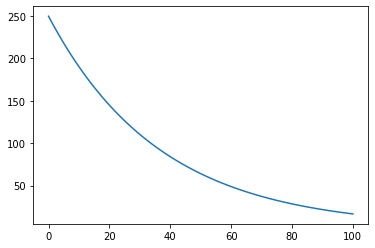

In [30]:
plt.plot(list(range(len(los_arr))),los_arr)

In [31]:
len(los_arr)

101

### increase learning rate to 0.2

In [33]:
# increase learning rate
alpha = 0.2
max_it = 10000
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = GD(X, y, alpha, max_it)   


C:\Users\Marim\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\Users\Marim\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Marim\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Marim\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


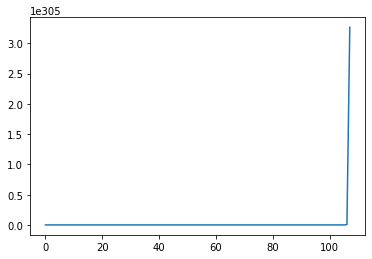

In [34]:
plt.plot(list(range(len(los_arr))),los_arr)

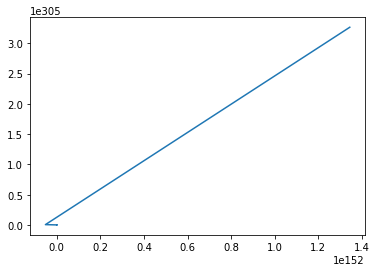

In [35]:
plt.plot(t_0_arr, los_arr)

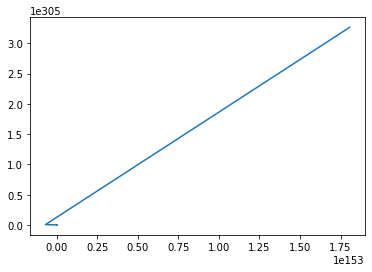

In [36]:
plt.plot(t_1_arr, los_arr)

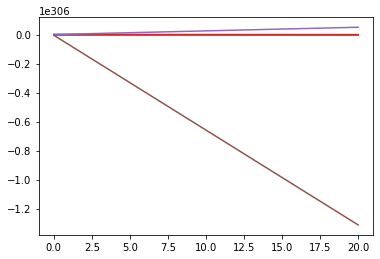

In [37]:
for i in range(len(hyper_arr)):
    
    plt.plot(X, hyper_arr[i])

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [38]:
def MiniBatchGD(X_in, y_in, alpha, it_max, batch_size):
    theta_0, theta_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    
    #batch_size = 10
    batch_nums = int(len(X_in) / batch_size) 
    print('batches:', batch_nums)
    start = 0
    end = batch_size
    
    for jj in range(it_max):
        
        for i in range(batch_nums):
            if i == batch_nums - 1:
                h = hyp(X_in[start:], theta_0, theta_1)

                hyp_arr.append(h)

                grad_0, grad_1 = gradient(X_in[start:], y_in[start:], h)

                theta_0, theta_1 = update_param(theta_0, theta_1, X_in[start:], h, y_in[start:], alpha)
                theta_0_arr.append(theta_0)
                theta_1_arr.append(theta_1)
                
                j = cost_fun(X_in[start:], y_in[start:], theta_0, theta_1, h)
                loss_arr.append(j)
                if j < 0.01:
                    break

                start, end = end, end + batch_size
                
            else:
                h = hyp(X_in[start:end], theta_0, theta_1)

                hyp_arr.append(h)

                grad_0, grad_1 = gradient(X_in[start:end], y_in[start:end], h)

                theta_0, theta_1 = update_param(theta_0, theta_1, X_in[start:end], h, y_in[start:end], alpha)
                theta_0_arr.append(theta_0)
                theta_1_arr.append(theta_1)
                
                j = cost_fun(X_in[start:end], y_in[start:end], theta_0, theta_1, h)
                loss_arr.append(j)
                if j < 0.01:
                    break

                start, end = end, end + batch_size
                
        #loss_arr.append(j)
        #if j < 0.1:
        #    break
        
        start = 0
        end = batch_size
        
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1

In [39]:
alpha = 0.0001
max_it = 10000
batch = 10
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = MiniBatchGD(X, y, alpha, max_it, batch)   


batches: 5


In [40]:
r2_score(y, hyp(X, opt_t_0, opt_t_1))

0.9981480665286095

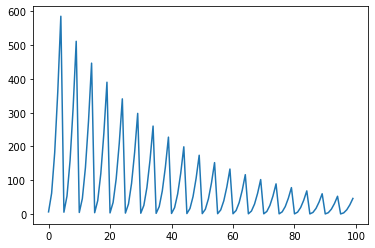

In [41]:
plt.plot(los_arr[:100])

In [42]:
los_arr[-1]

0.0042778580724475036

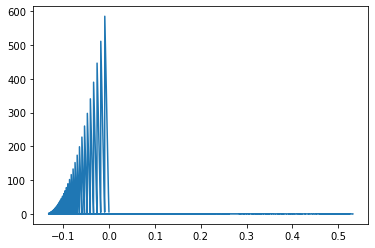

In [43]:
plt.plot(t_0_arr, los_arr)

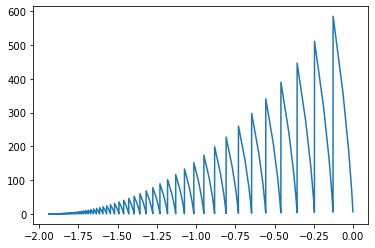

In [44]:
plt.plot(t_1_arr, los_arr)

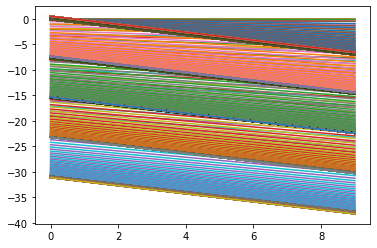

In [45]:
for i in range(len(hyper_arr)):    
    plt.plot( hyper_arr[i])

### change batch size to 25

In [46]:
alpha = 0.0001
max_it = 10000
batch = 25
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = MiniBatchGD(X, y, alpha, max_it, batch)   


batches: 2


In [47]:
r2_score(y, hyp(X, opt_t_0, opt_t_1))

0.9991314946121876

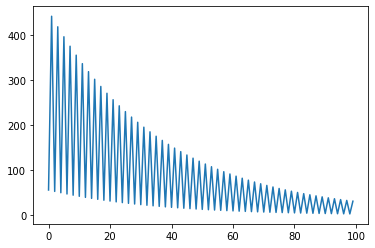

In [48]:
plt.plot(los_arr[:100])

In [49]:
los_arr[-1]

0.014810153434510176

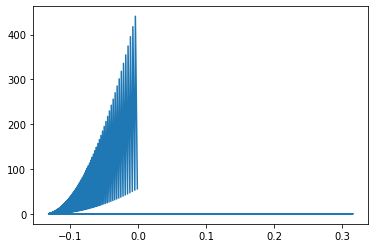

In [50]:
plt.plot(t_0_arr, los_arr)

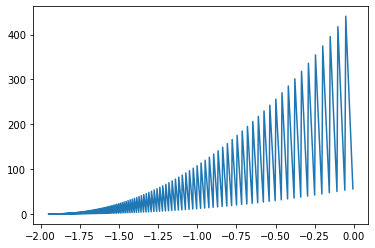

In [51]:
plt.plot(t_1_arr, los_arr)

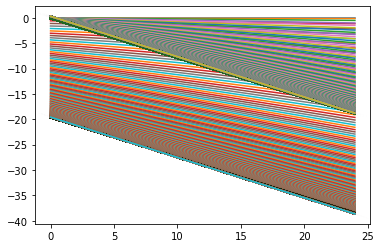

In [99]:
for i in range(len(hyper_arr)):
    
    plt.plot( hyper_arr[i])

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [52]:
def MiniBatchGD(X_in, y_in, alpha, it_max, batch_size):
    theta_0, theta_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    
    batch_nums = int(len(X_in) / batch_size) 
    print('batches:', batch_nums)
    start = 0
    end = batch_size
    
    for jj in range(batch_nums):
        if jj == batch_nums - 1:
            X_mini = X_in[start:]
            y_mini = y_in[start:]
        else:
            X_mini = X_in[start:end]
            y_mini = y_in[start:end]
            
        for i in range(it_max):
            h = hyp(X_mini, theta_0, theta_1)

            hyp_arr.append(h)

            grad_0, grad_1 = gradient(X_mini, y_mini, h)

            theta_0, theta_1 = update_param(theta_0, theta_1, X_mini, h, y_mini, alpha)
            theta_0_arr.append(theta_0)
            theta_1_arr.append(theta_1)

            j = cost_fun(X_mini, y_mini, theta_0, theta_1, h)
            loss_arr.append(j)
            if j < 0.01:
                break

        start, end = end, end + batch_size
                
        
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1
    

In [53]:
alpha = 0.0001
max_it = 10000
batch = 1
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = MiniBatchGD(X, y, alpha, max_it, batch)   


batches: 50


In [54]:
r2_score(y, hyp(X, opt_t_0, opt_t_1))

0.993247845525216

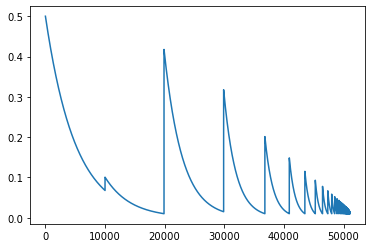

In [56]:
plt.plot(los_arr)

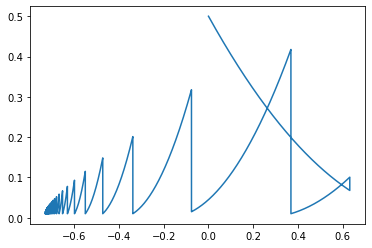

In [57]:
plt.plot(t_0_arr, los_arr)

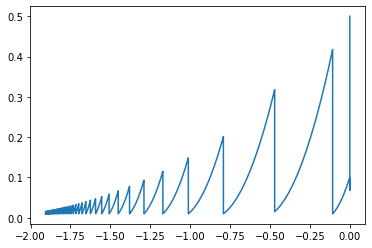

In [58]:
plt.plot(t_1_arr, los_arr)

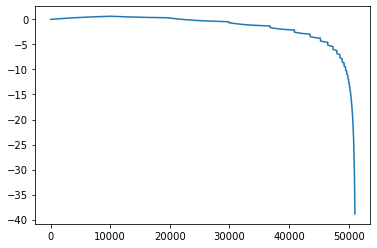

In [59]:
#for i in range(1000):
    
plt.plot(hyper_arr)

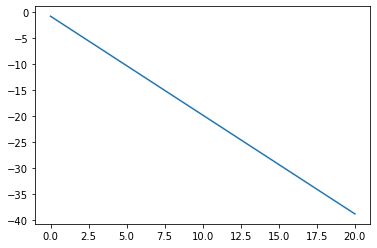

In [60]:
plt.plot(X, hyp(X, opt_t_0, opt_t_1))
